## Intro to Statistical Hypothesis Testing 

> Statistical hypothesis testing allows us to **make decisions in presence of incomplete data.** 

By definition, these decisions are uncertain. Statisticians have developed rigorous methods to evaluate this risk. Nevertheless, a part of subjectivity is always involved in the decision-making process. 

> The theory is just a tool that helps making decisions in an uncertain world.

It is essential to understand the 

- ideas behind statistical hypothesis testing
- to perform a test and interpret its output, 
- mathematical ideas underlying this process. 

This kind of method (also called **frequentist method**), although widely used in science, is subject to many **criticisms**. 


## Hypothesis Testing: Steps

1. SPECIFY THE HYPOTHESIS: notably the null hypothesis which is the opposite of the hypothesis we want to prove (with a certain degree of confidence).
2. COMPUTE A TEST STATISTIC: a mathematical formula depending on the test type, the model, the hypotheses, and the data.
3. USE STATISTIC: to accept the hypothesis, reject it, or fail to conclude.

## Example: Coin Tosses

- We want to know whether a coin is fair (null hypothesis). 
    - Thus, the H0 becomes H0: q = 1/2      

- Flip a coin **n** times and we observe **h** heads.  

- Use the Bernoulli Distribution, with parameter `q` that takes 
    - is 0 (tail) with probability `1-q`
    - is 1 (head) with probability `q`  
    - http://en.wikipedia.org/wiki/Bernoulli_distribution
    
    
- Note that for the Bernoulli Distribution,
    - Mean = q
    - Variance = q(1-q)
    
- The z-test is the normalized version of sample mean. (see formula below)


>Let's suppose that, after n=100 flips we get h=61 heads.  

>We choose a significance level of 0.05: is the coin fair or not    

## I have a coin. Out of 100 flips, it gives me 65 heads. Is the coin fair?

In [6]:
import numpy as np
import scipy.stats as st
import scipy.special as sp

n = 100  # number of coin flips
h = 65  # number of heads
q = .5  # null-hypothesis of fair coin

# Compute the z-score, which is defined by the following formula
xbar = float(h)/n
z = (xbar - q) * np.sqrt(n / (q*(1-q))); z


# from the z-score, we can compute the p-value as follows:
pval = 2 * (1 - st.norm.cdf(z)); pval

0.0026997960632602069

<big>

This p-value is less than 0.05, so we reject the null hypothesis and conclude that the coin is probably not fair.

To recap, here's what we did:

- The coin tossing experiment is modeled as a sequence of n independent random variables following the Bernoulli Distribution, where each `x` represents a coin flip. 
- After our experiment, we get actual values (samples) for these variables. 
- We use these values to calculate z (our test statistic.) 

And then we estimate, under the null-hypothesis, what is the probability of obtaining a z-test higher than some quantity? This probability is called the p-value.  

- Use the CDF to find the p-value with this z-statistic.

- If the p-value is less than 5% (the significance level chosen at the beginning of the experiment) we reject the H0 and decide that the coin is unfair.

NOTE: The z-test approximately follows a standard Gaussian distribution for large N.

----

In [2]:
# Simulating 100 flips of a coin
heads_simulation = [st.bernoulli.rvs(0.5, size=100).mean() for x in range(10000)]

In [3]:
from pandas import Series
%pylab inline

Populating the interactive namespace from numpy and matplotlib


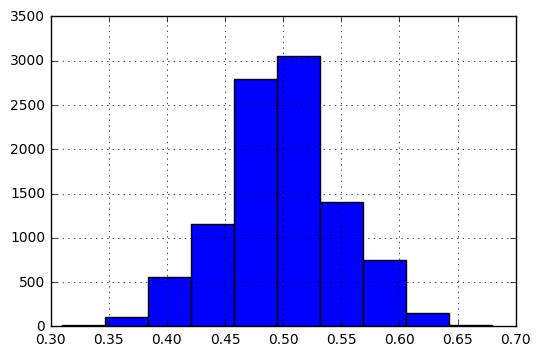

In [4]:
Series(heads_simulation).hist();

## Central Limit Theorem

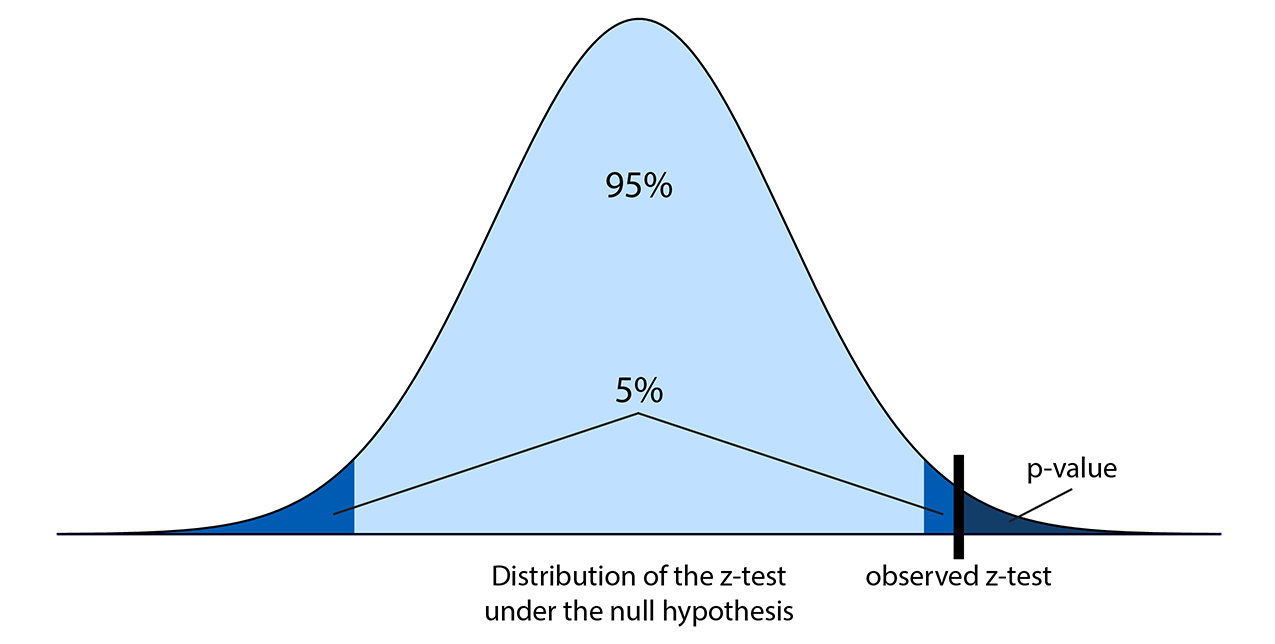

In [16]:
from IPython.display import Image
Image("http://ipython-books.github.io/images/gaussian.png")

In [18]:
import seaborn as sns

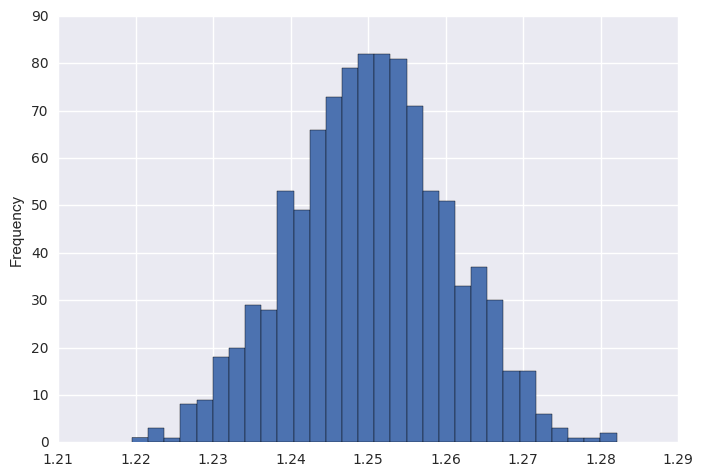

In [20]:
(Series([Series(st.pareto.rvs(5, size=1000)).mean() for x in range(1000)])
 .plot.hist(bins=30))

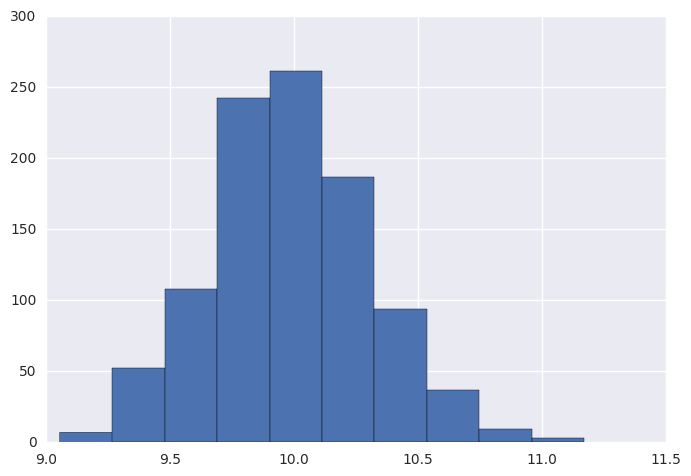

In [22]:
Series([Series(st.gamma.rvs(10, size=100)).mean() for x in range(1000)]).hist()